In [1]:
import mne, os
from signal_processing.pre_process import *
from basic.arrange_data import read_files, create_results_folders
from signal_processing.erp_analysis import *
import numpy as np
from cmath import nan
import matplotlib.pyplot as plt
import pandas as pd

mne.set_log_level('error')

EXCLUDED SUBJECT:  OKTOS_0019 in OKTOS_0019_00A_AO at Data/Clean/OKTOS/Auditory Oddball/Baseline/OKTOS_0019_00A_AO_clean-epo.fif
EXCLUDED SUBJECT:  OKTOS_0024 in OKTOS_0024_00A_AO at Data/Clean/OKTOS/Auditory Oddball/Baseline/OKTOS_0024_00A_AO_clean-epo.fif
EXCLUDED SUBJECT:  OKTOS_0033 in OKTOS_0033_00A_AO at Data/Clean/OKTOS/Auditory Oddball/Baseline/OKTOS_0033_00A_AO_clean-epo.fif
Files in Data/Clean/OKTOS/Auditory Oddball/Baseline read in: 24
EXCLUDED SUBJECT:  OKTOS_0019 in OKTOS_0019_06D_AO at Data/Clean/OKTOS/Auditory Oddball/6 weeks/OKTOS_0019_06D_AO_clean-epo.fif
EXCLUDED SUBJECT:  OKTOS_0024 in OKTOS_0024_06D_AO at Data/Clean/OKTOS/Auditory Oddball/6 weeks/OKTOS_0024_06D_AO_clean-epo.fif
EXCLUDED SUBJECT:  OKTOS_0033 in OKTOS_0033_06D_AO at Data/Clean/OKTOS/Auditory Oddball/6 weeks/OKTOS_0033_06D_AO_clean-epo.fif
Files in Data/Clean/OKTOS/Auditory Oddball/6 weeks read in: 24
EXCLUDED SUBJECT:  OKTOS_0019 in OKTOS_0019_07A_AO at Data/Clean/OKTOS/Auditory Oddball/10 weeks/OKTOS

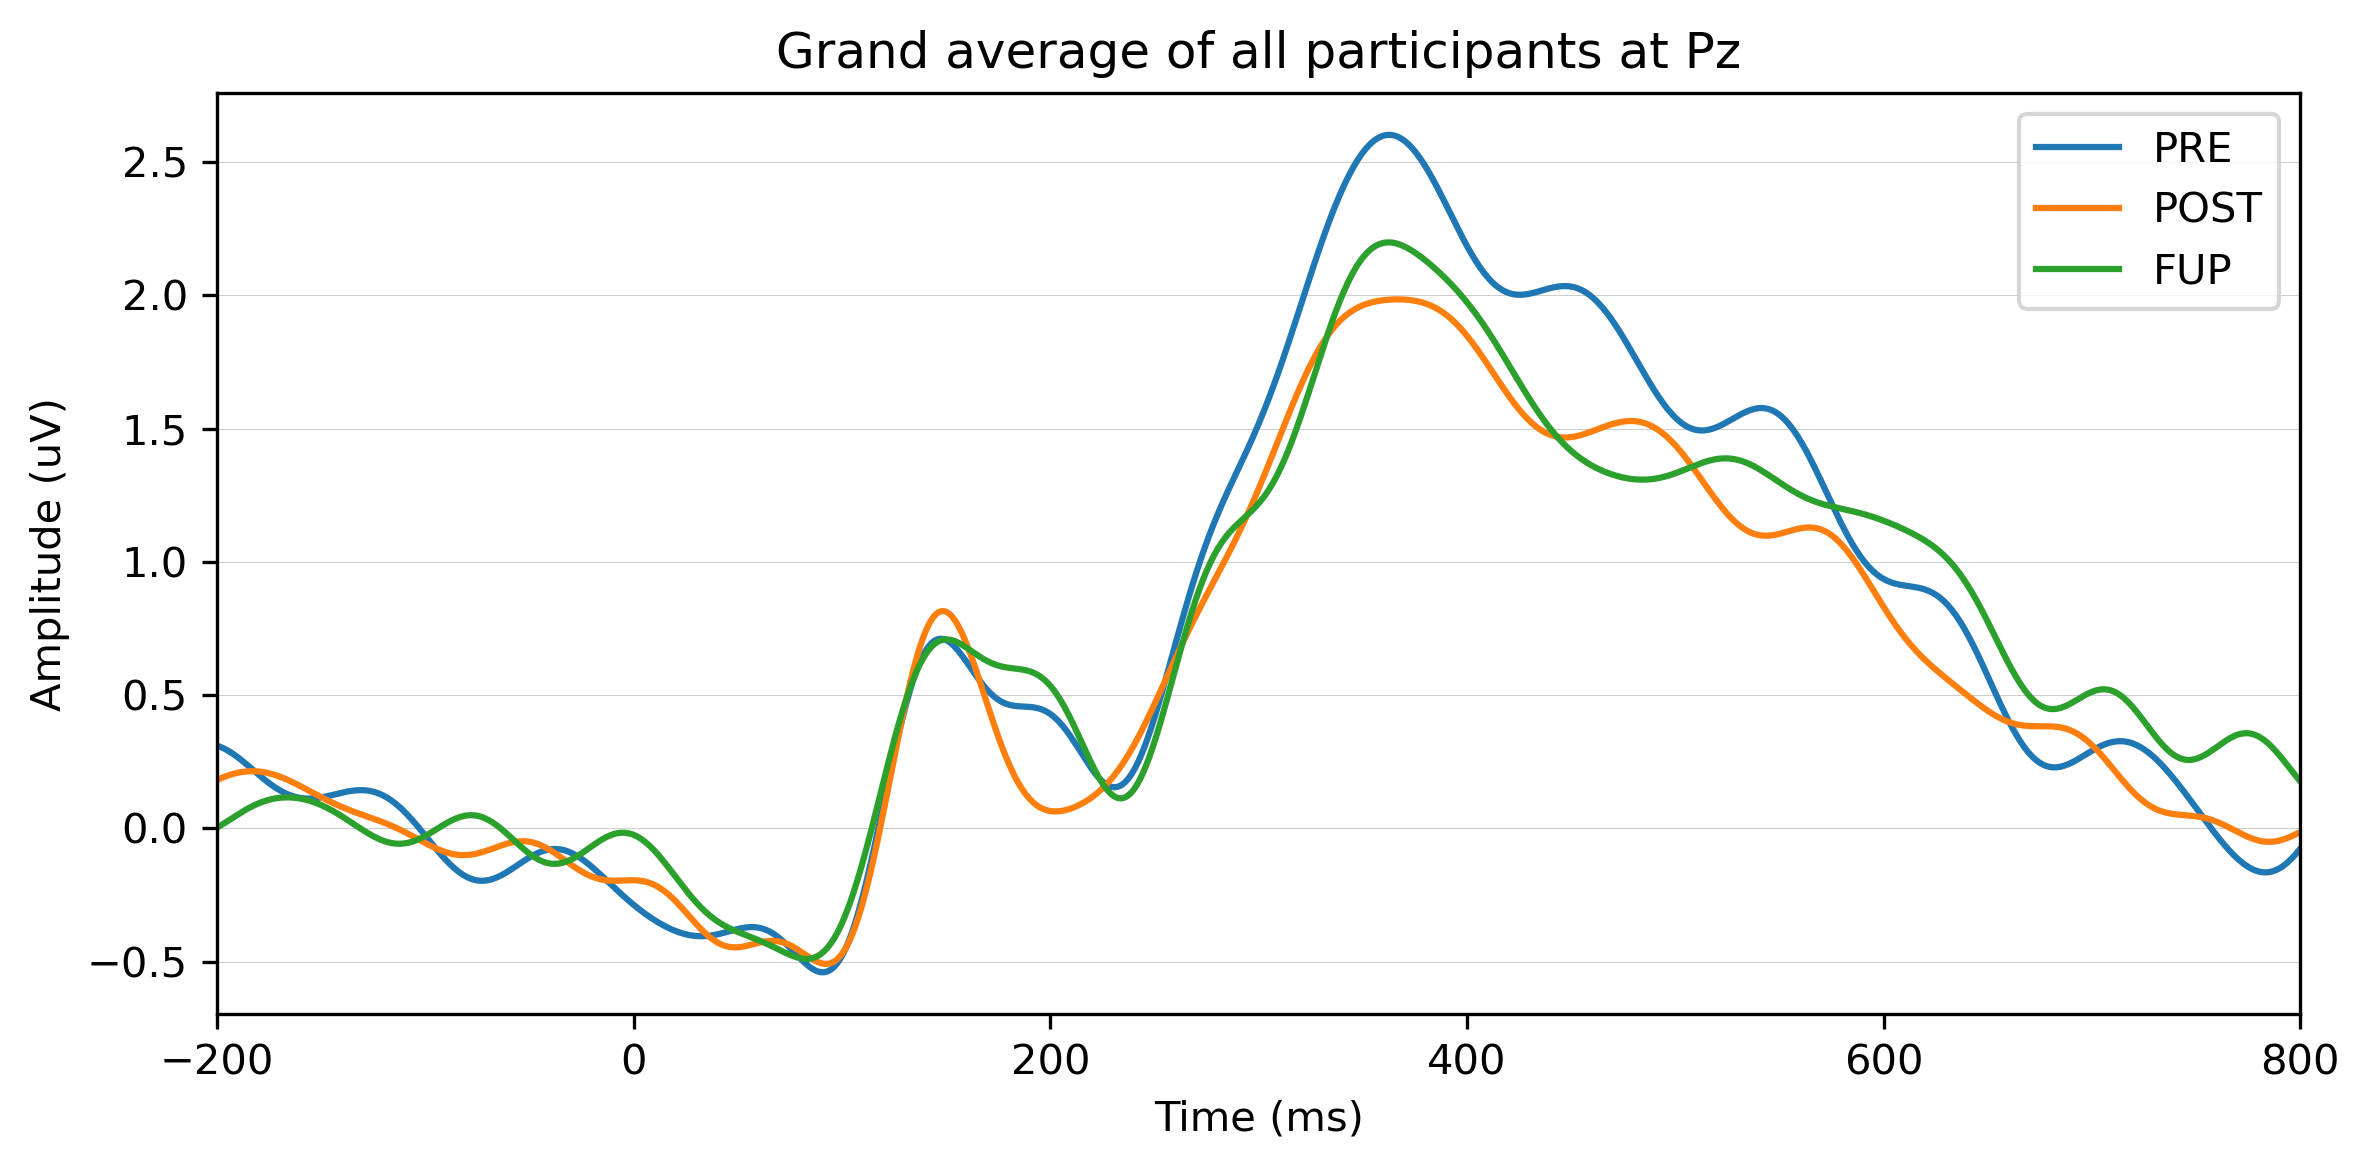

In [2]:
# Define the folders where to get the epochs files and to save the plots
clean_folder = r"Data/Clean/OKTOS"
results_foldername = r"Results/OKTOS"

# Define all the experiment conditions you want to plot and compare
exp_folders = [r"Auditory Oddball/Baseline",
               r"Auditory Oddball/6 weeks",
               r"Auditory Oddball/10 weeks"]
exp_legend = ['PRE','POST','FUP']
savefig = False

exclude_subjects = ['OKTOS_0019','OKTOS_0024','OKTOS_0033']

channel_pick = 'Pz'
event_list = ['target after 1 standard','target after 3 standards','target after 5 standards',
            'target after 7 standards','target after 9 standards','target after 11 standards']

master_grand_evoked_data = [None]*len(exp_folders)
master_grand_evoked_times = [None]*len(exp_folders)

for e, exp_folder in enumerate(exp_folders):
    dir_inprogress = os.path.join(clean_folder,exp_folder)
    file_dirs, subject_names = read_files(dir_inprogress,"_clean-epo.fif",exclude_subjects=exclude_subjects)

    evoked_signal = [None]*len(file_dirs)
    for i in range(len(file_dirs)):
        # Read the clean data from the disk
        epochs = mne.read_epochs(fname='{}/{}_clean-epo.fif'.format(dir_inprogress,subject_names[i]),verbose=False)
        
        # Create an averaged evoked object from epochs for 
        evoked_signal[i] = epochs[event_list].average(picks=channel_pick)

    master_grand_evoked_data[e] = mne.grand_average(evoked_signal).data[0]*1e6
    master_grand_evoked_times[e] = mne.grand_average(evoked_signal).times*1e3

fig, ax = plt.subplots(figsize=(8, 4), layout='tight', dpi=300)
for ix in range(len(master_grand_evoked_times)):
    ax.plot(master_grand_evoked_times[ix],master_grand_evoked_data[ix],linewidth=1.5)
ax.legend(exp_legend)
ax.set_title('Grand average of all participants at {}'.format(channel_pick))
plt.xlim([-200,800])
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude (uV)')
plt.grid(which='major',axis='y',linewidth = 0.15)
if savefig == True:
    plt.savefig(fname='{}/GRAND_erpfig_{}.png'.format(results_foldername,channel_pick),dpi=300)
plt.show()
